# Explore here

In [3]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
main_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

main_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Let's Build a Model

#### (but don't forget to eat your EDA vegetables)

In [7]:
X = main_df.drop(columns=['Outcome'])

y = main_df['Outcome']

In [8]:
X.shape

(768, 8)

In [9]:
y.shape

(768,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1987)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree

In [63]:
rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

train_preds = rfc_model.predict(X_train)
test_preds = rfc_model.predict(X_test)

In [64]:
accuracy_score(y_train, train_preds)

1.0

In [65]:
accuracy_score(y_test, test_preds)

0.7792207792207793

In [66]:
pd.DataFrame([rfc_model.feature_names_in_,rfc_model.feature_importances_]).T

,0,1
0,Pregnancies,0.081817
1,Glucose,0.247415
2,BloodPressure,0.092141
3,SkinThickness,0.070108
4,Insulin,0.074236
5,BMI,0.18134
6,DiabetesPedigreeFunction,0.129088
7,Age,0.123856


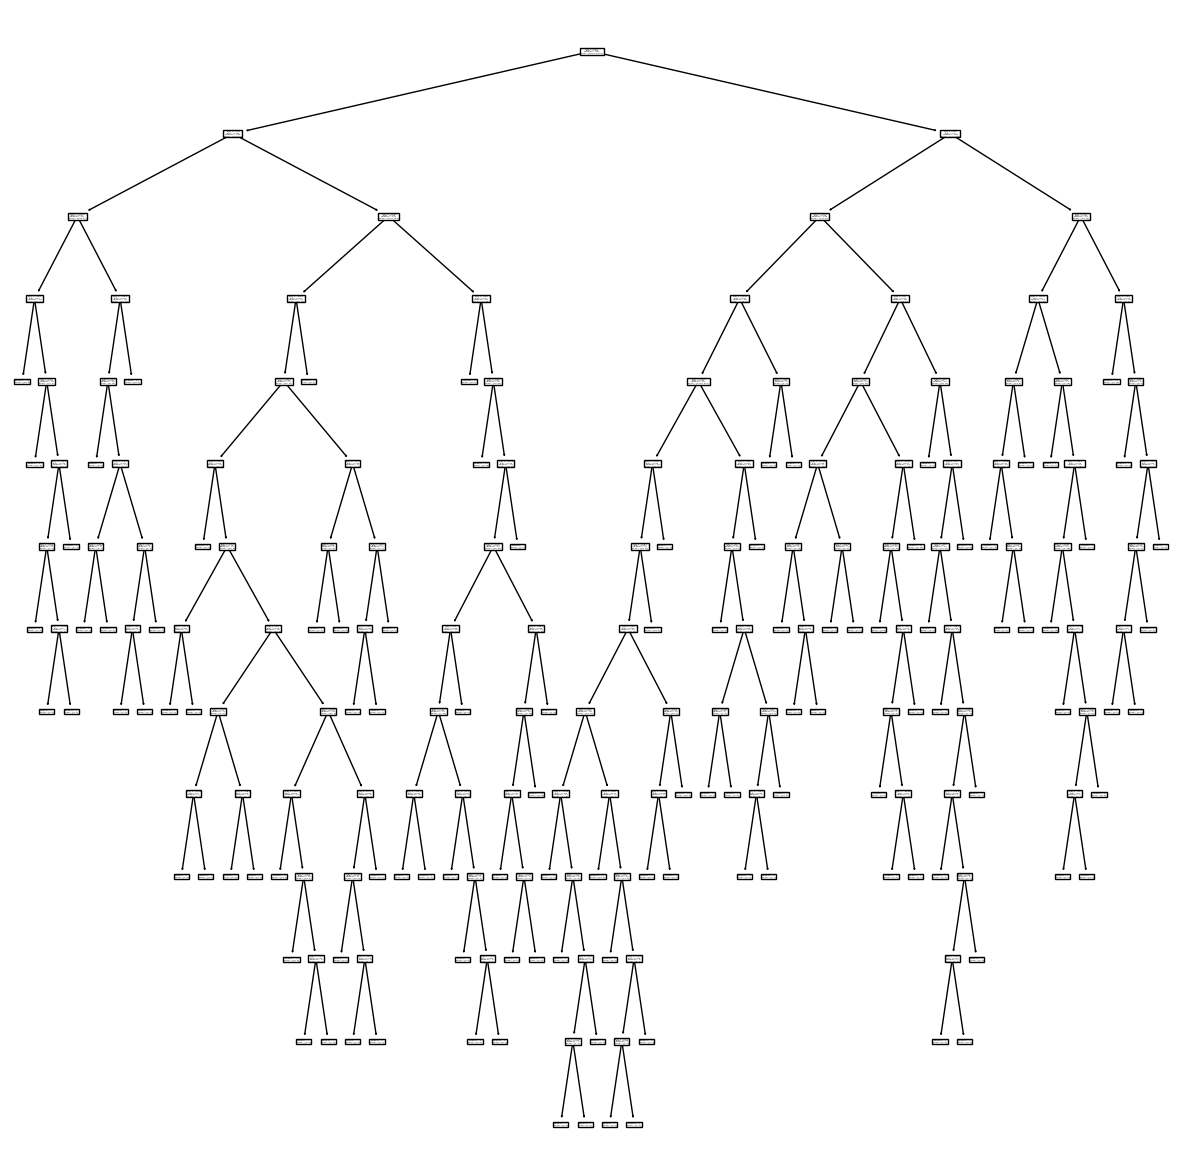

In [67]:
plt.figure(figsize=(15,15))
tree.plot_tree(rfc_model.estimators_[0])

plt.show();

In [68]:
confusion_matrix(y_train, train_preds)

array([[399,   0],
       [  0, 215]])

In [69]:
confusion_matrix(y_test, test_preds)

array([[87, 14],
       [20, 33]])

In [70]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       215

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [72]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       101
           1       0.70      0.62      0.66        53

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.78       154



## START OVER WITH A GRIDSEARCH

In [41]:
from sklearn.model_selection import GridSearchCV

In [73]:
#create a dictionary of hyperparameters that we want to tune

hyperparameters = {
    "n_estimators" : [20, 50, 100, 150],
    "max_depth" : [2, 5, 8, 10],
    "min_samples_split" : [2, 4, 6, 8],
    "min_samples_leaf" : [2, 4, 8]
}

In [122]:
#base_rf_model = RandomForestClassifier()

grid_model = GridSearchCV(RandomForestClassifier(random_state=25), param_grid= hyperparameters, scoring="accuracy", cv = 5)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='accuracy')

In [124]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=25)

In [76]:
new_rfc_model = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=20)

new_rfc_model.fit(X_train, y_train)

train_preds = new_rfc_model.predict(X_train)
test_preds = new_rfc_model.predict(X_test)

In [77]:
accuracy_score(y_train, train_preds)

0.8452768729641694

In [78]:
accuracy_score(y_test, test_preds)

0.7857142857142857

In [79]:
confusion_matrix(y_train, train_preds)

array([[365,  34],
       [ 61, 154]])

In [80]:
confusion_matrix(y_test, test_preds)

array([[86, 15],
       [18, 35]])

In [81]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       399
           1       0.82      0.72      0.76       215

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.82       614
weighted avg       0.84      0.85      0.84       614



In [82]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       101
           1       0.70      0.66      0.68        53

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



### One More Time

In [83]:
hyperparameters2 = {
    "n_estimators" : [5, 10, 20, 30],
    "max_depth" : [8, 10, 12, 15],
    "min_samples_split" : [4, 6, 8, 10],
    "min_samples_leaf" : [4, 8, 12, 15]
}

In [97]:

grid_model2 = GridSearchCV(RandomForestClassifier(), param_grid= hyperparameters2, scoring="recall", cv = 7)

grid_model2.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12, 15],
                         'min_samples_leaf': [4, 8, 12, 15],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [5, 10, 20, 30]},
             scoring='recall')

In [98]:
grid_model2.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=5)

In [99]:
last_rfc_model = RandomForestClassifier()
last_rfc_model.set_params(**grid_model2.best_params_)

last_rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=5)

In [100]:
train_preds = last_rfc_model.predict(X_train)
test_preds = last_rfc_model.predict(X_test)

In [101]:
accuracy_score(y_train, train_preds)

0.8208469055374593

In [102]:
accuracy_score(y_test, test_preds)

0.8051948051948052

In [103]:
confusion_matrix(y_train, train_preds)

array([[366,  33],
       [ 77, 138]])

In [107]:
confusion_matrix(y_test, test_preds)

array([[91, 10],
       [20, 33]])

In [108]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       399
           1       0.81      0.64      0.72       215

    accuracy                           0.82       614
   macro avg       0.82      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614



In [109]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       101
           1       0.77      0.62      0.69        53

    accuracy                           0.81       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [110]:
pd.DataFrame([last_rfc_model.feature_names_in_, last_rfc_model.feature_importances_]).T

,0,1
0,Pregnancies,0.1339
1,Glucose,0.353889
2,BloodPressure,0.043413
3,SkinThickness,0.04641
4,Insulin,0.032066
5,BMI,0.151745
6,DiabetesPedigreeFunction,0.064799
7,Age,0.173778


In [111]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
513,2,91,62,0,0,27.3,0.525,22
38,2,90,68,42,0,38.2,0.503,27
369,1,133,102,28,140,32.8,0.234,45
381,0,105,68,22,0,20.0,0.236,22
...,...,...,...,...,...,...,...,...
202,0,108,68,20,0,27.3,0.787,32
582,12,121,78,17,0,26.5,0.259,62
746,1,147,94,41,0,49.3,0.358,27
526,1,97,64,19,82,18.2,0.299,21


In [121]:
sample_person = np.array([0, 150, 100, 25, 75, 30, 0.5, 99]).reshape(-1, 1)

rfc_model.predict(sample_person.T)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])